In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from datetime import timedelta, datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
# Look at sub-region single example
dom_df = pd.read_csv('/kaggle/input/hourly-energy-consumption/DOM_hourly.csv')
dom_df.shape

(116189, 2)

In [3]:
# Read full parquet
energy_df = pd.read_parquet('/kaggle/input/hourly-energy-consumption/est_hourly.paruqet')
energy_df.reset_index(inplace=True)
print(energy_df.shape)
energy_df.tail(5)

(178262, 13)


,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
178261,2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


In [4]:
energy_df.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


Text(0.5, 0, 'MW Usage')

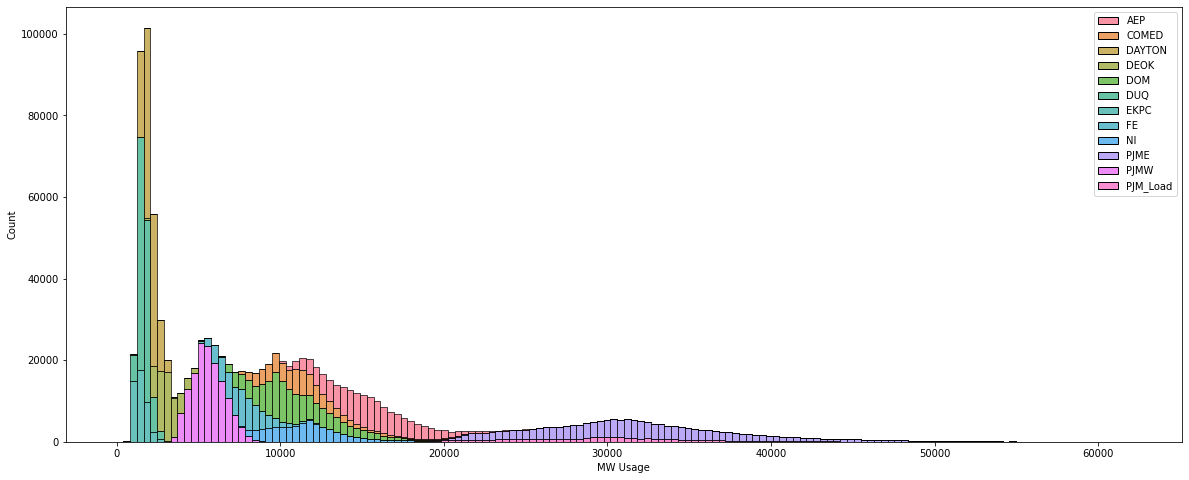

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=energy_df, bins=150, ax=ax, multiple='stack')
ax.set_xlabel("MW Usage")

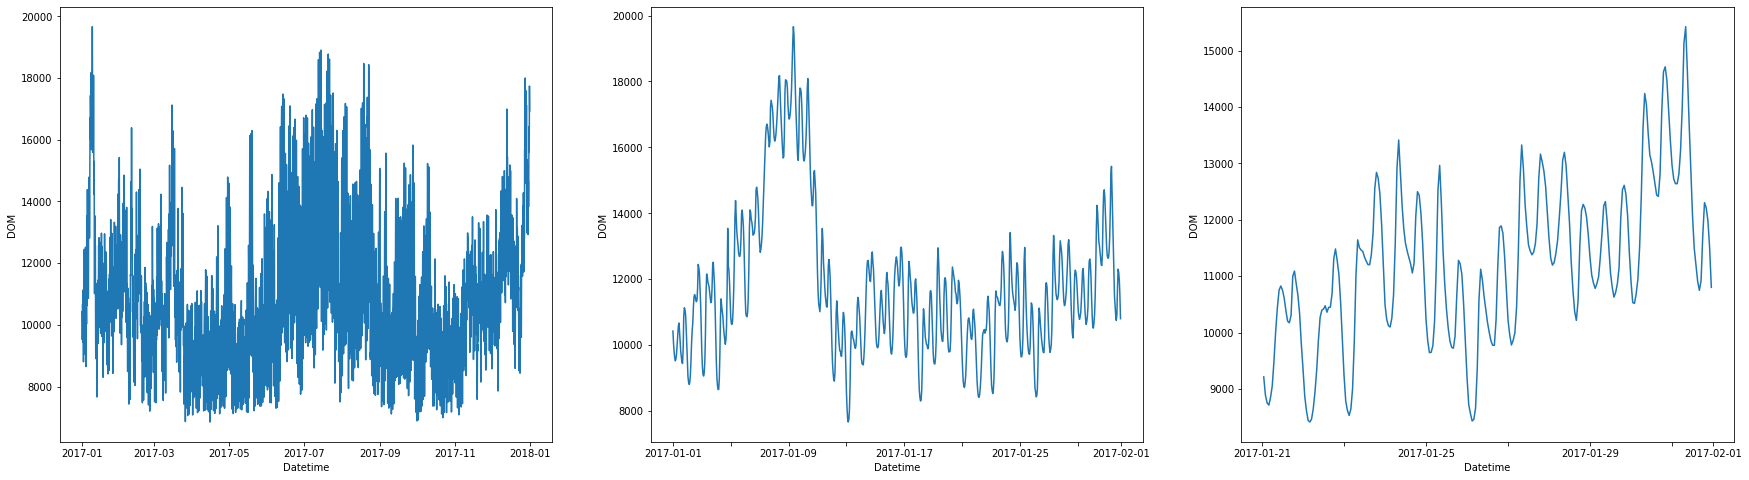

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(1)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 1, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

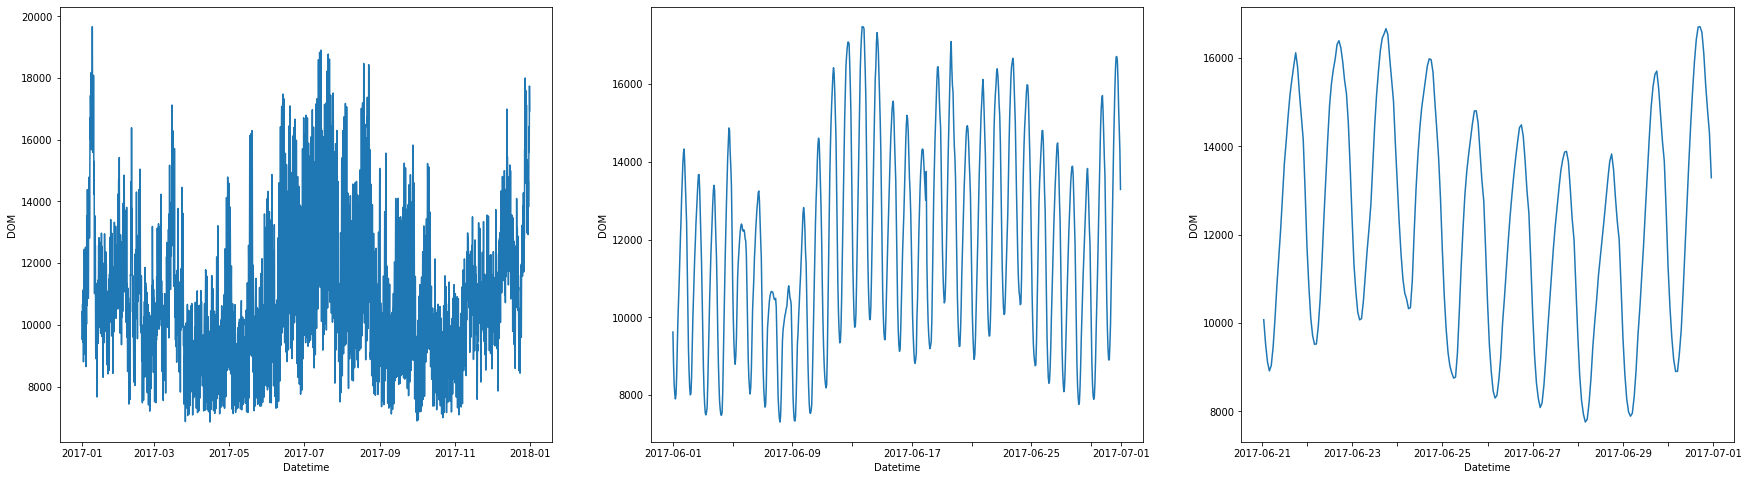

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(6)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 6, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

In [8]:
energy_df['dow'] = energy_df['Datetime'].dt.dayofweek
energy_df['doy'] = energy_df['Datetime'].dt.dayofyear
energy_df['year'] = energy_df['Datetime'].dt.year
energy_df['month'] = energy_df['Datetime'].dt.month
energy_df['quarter'] = energy_df['Datetime'].dt.quarter
energy_df['hour'] = energy_df['Datetime'].dt.hour
energy_df['weekday'] = energy_df['Datetime'].dt.day_name()
energy_df['woy'] = energy_df['Datetime'].dt.isocalendar().week
energy_df['dom'] = energy_df['Datetime'].dt.day # Day of Month
energy_df['date'] = energy_df['Datetime'].dt.date

In [9]:
energy_df.sample(20)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,...,dow,doy,year,month,quarter,hour,weekday,woy,dom,date
32057,2001-02-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,35,2001,2,1,2,Sunday,5,4,2001-02-04
175338,2018-05-02 04:00:00,10709.0,8591.0,1452.0,2115.0,7304.0,1107.0,848.0,5715.0,NaN,...,2,122,2018,5,2,4,Wednesday,18,2,2018-05-02
20900,2000-05-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,135,2000,5,2,2,Sunday,19,14,2000-05-14
111820,2011-12-29 08:00:00,17768.0,10975.0,2050.0,NaN,13453.0,1765.0,NaN,8292.0,NaN,...,3,363,2011,12,4,8,Thursday,52,29,2011-12-29
174299,2018-06-15 21:00:00,17249.0,16062.0,2505.0,4074.0,13030.0,1698.0,1875.0,8481.0,NaN,...,4,166,2018,6,2,21,Friday,24,15,2018-06-15
148193,2015-11-04 03:00:00,10791.0,8274.0,1438.0,2200.0,7260.0,1156.0,815.0,5744.0,NaN,...,2,308,2015,11,4,3,Wednesday,45,4,2015-11-04
95418,2009-11-13 17:00:00,14310.0,NaN,1890.0,NaN,10549.0,1611.0,NaN,NaN,11421.0,...,4,317,2009,11,4,17,Friday,46,13,2009-11-13
29449,2001-05-24 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,144,2001,5,2,9,Thursday,21,24,2001-05-24
35692,2002-09-06 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,249,2002,9,3,14,Friday,36,6,2002-09-06
62562,2005-08-13 10:00:00,17157.0,NaN,2479.0,NaN,13522.0,2169.0,NaN,NaN,12139.0,...,5,225,2005,8,3,10,Saturday,32,13,2005-08-13


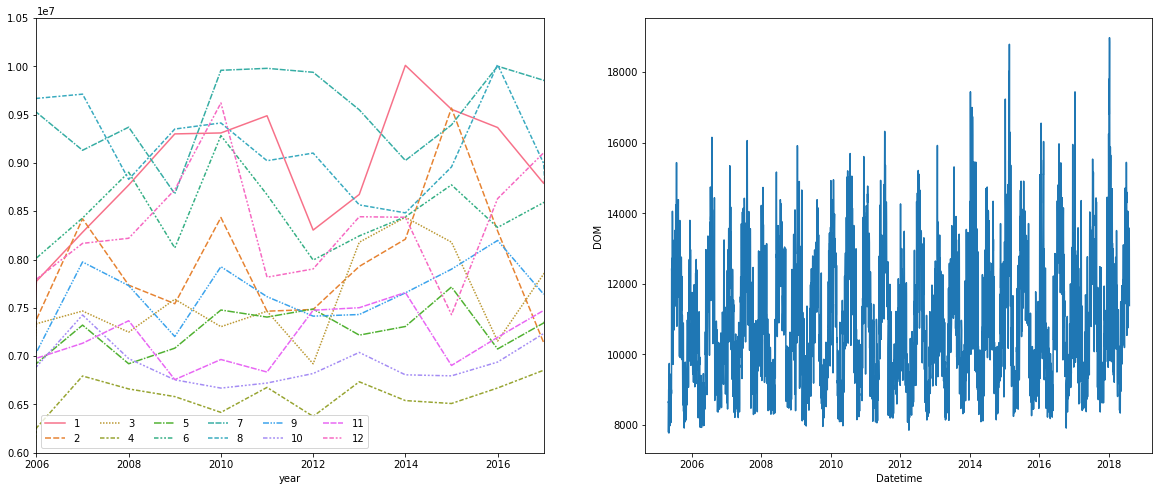

In [10]:
historic_DOM = energy_df[['DOM', 'year', 'month']]
#historic_DOM.index.value_counts()
historic_DOM_wide = historic_DOM.reset_index().pivot_table(values='DOM', index='year', columns=['month'], aggfunc=np.sum)
historic_DOM_wide.head(20)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax[0] = sns.lineplot(data=historic_DOM_wide, ax=ax[0])
ax[0].set_xlim([2006,2017])
ax[0].set_ylim([6000000, 10500000])
ax[0].legend(loc="lower left", ncol=6)
# Resample to daily precip sum and save as new dataframe
energy_df_daily = energy_df.set_index('Datetime').resample('D').mean()
ax[1] = sns.lineplot(data=energy_df_daily, x="Datetime", y="DOM", ax=ax[1])

In [11]:
energy_df_daily['DOM'].count()

4843

Train on 4000 samples, test on the rest.

In [12]:
#selected_rows = df[~df['Age'].isna()]
dom_train = energy_df_daily[~energy_df_daily['DOM'].isna()]
time_based_feats = ['dow', 'doy', 'year', 'month', 'quarter', 'hour']
target = ['DOM']
dom_y = dom_train[target]
dom_X = dom_train[time_based_feats]

In [13]:
X_train = dom_X.iloc[:4000, :]
X_test = dom_X.iloc[4000:, :]
y_train = dom_y.iloc[:4000, :]
y_test = dom_y.iloc[4000:, :]

Baseline XGB regression model

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[04:10:06] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10915.36345	validation_1-rmse:11293.63050
[100]	validation_0-rmse:4163.06505	validation_1-rmse:4570.70343
[200]	validation_0-rmse:1873.05951	validation_1-rmse:2302.44940
[300]	validation_0-rmse:1252.24034	validation_1-rmse:1687.32130
[400]	validation_0-rmse:1121.91471	validation_1-rmse:1596.76930
[500]	validation_0-rmse:1089.44346	validation_1-rmse:1577.13483
[530]	validation_0-rmse:1083.51338	validation_1-rmse:1583.03681


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [15]:
predictions = reg.predict(X_test)

In [16]:
predictions.shape

(843,)

In [17]:
pd.DataFrame(predictions)

,0
0,9483.933594
1,9483.933594
2,9343.198242
3,8930.720703
4,8977.180664
...,...
838,12566.738281
839,12539.527344
840,12539.527344
841,12539.527344


In [18]:
df_predvtruth = pd.concat([y_test, pd.DataFrame(predictions, index=y_test.index)], axis=1)

RMSE Score on Test set: 1574.531


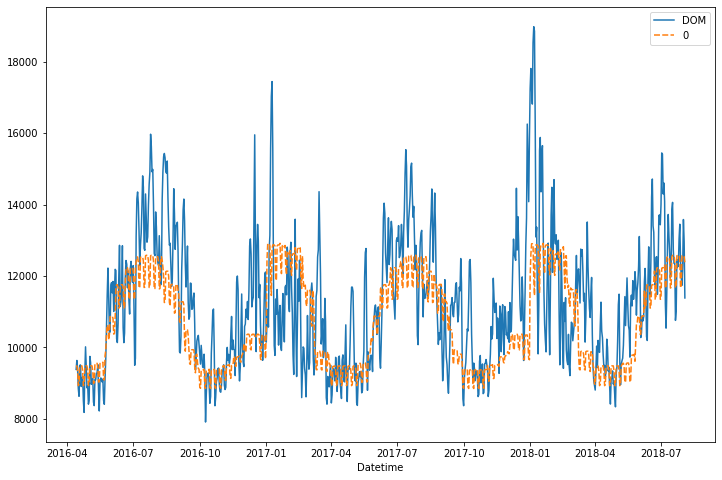

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))
sns.lineplot(data=df_predvtruth, ax=ax)
score = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

Optimising XGB regressor model with a RandomisedGridSearch (takes a while to run on Kaggle)

In [20]:
# from sklearn.model_selection import RandomizedSearchCV
# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': [100, 500, 900, 1100, 1500],
#     'max_depth': [2, 3, 5, 10, 15],
#     'learning_rate': [0.05, 0.1, 0.15, 0.20],
#     'min_child_weight': [1, 2, 3, 4]
#     }

# xgbr = xgb.XGBRegressor(random_state=1)

# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=xgbr,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=400,
#             scoring = 'neg_root_mean_squared_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(X_train,y_train)

# random_cv.best_estimator_

In [21]:
best_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1)

[0]	validation_0-rmse:10483.50990	validation_1-rmse:10858.58103
[99]	validation_0-rmse:1158.09068	validation_1-rmse:1493.64898
RMSE Score on Test set: 1493.649


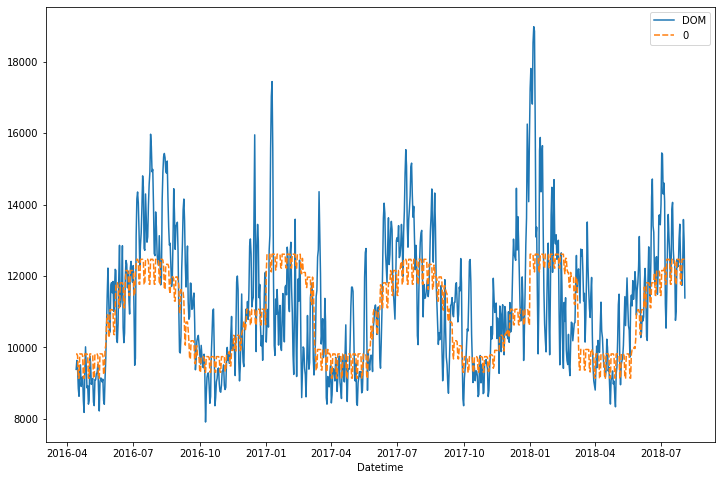

In [22]:
#best_xgb = random_cv.best_estimator_
best_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
predictions = best_xgb.predict(X_test)
df_predvtruth = pd.concat([y_test, pd.DataFrame(predictions, index=y_test.index)], axis=1)
fig, ax = plt.subplots(1,1,figsize=(12, 8))
sns.lineplot(data=df_predvtruth, ax=ax)
score = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

### **ARIMA Modelling**

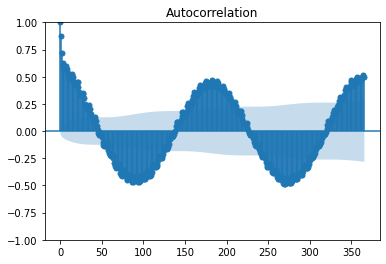

In [23]:
import statsmodels.api as sm
#from statsmodels.graphics import tsa
sm.graphics.tsa.plot_acf(y_train, lags=365)
plt.show()

We can realise very strong seasonal correlations in the energy production. This suggests the use of a SARIMA (seasonal) model

In [24]:
!pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

# Fit an ARIMA
arima = pm.ARIMA(order=(1, 1, 2), seasonal_order=(0, 1, 1, 6))
arima.fit(y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00


ARIMA(order=(1, 1, 2), seasonal_order=(0, 1, 1, 6))

RMSE Score on Test set: 1874.273


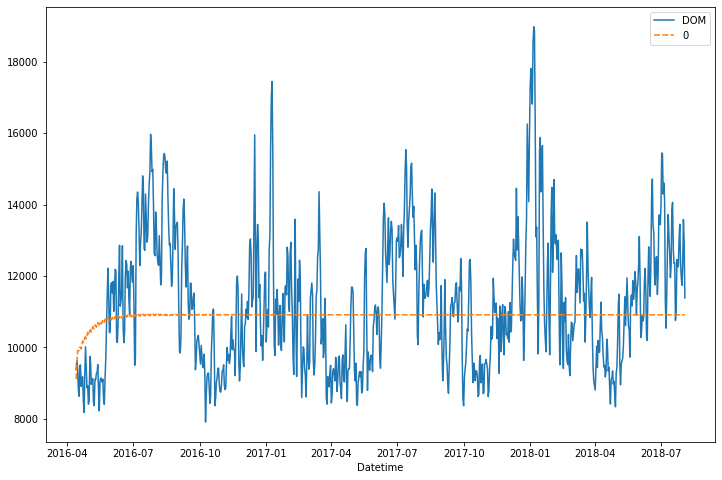

In [25]:
# Fit a simple auto_arima model
modl = pm.auto_arima(y_train, seasonal=True,
                     stepwise=True, suppress_warnings=True, error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=y_test.shape[0], return_conf_int=True)

# Print the error:
df_predvtruth = pd.concat([y_test, pd.DataFrame(preds, index=y_test.index)], axis=1)
fig, ax = plt.subplots(1,1,figsize=(12, 8))
sns.lineplot(data=df_predvtruth, ax=ax)
score = mean_squared_error(y_test, preds, squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

### **LSTM**

In [26]:
# REFERENCE - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
        

In [27]:
x,y = split_sequence([3,4,6,7,3,56,78,23,45,67,3,56], 5)

In [28]:
y_train

,DOM
Datetime,
2005-05-01,7812.347826
2005-05-02,8608.083333
2005-05-03,8665.000000
2005-05-04,8628.791667
2005-05-05,8702.541667
...,...
2016-04-08,9521.250000
2016-04-09,9820.625000
2016-04-10,10176.875000


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from keras import backend as K

# define input sequence
raw_seq = y_train['DOM'].to_list()
# choose a number of time steps
n_steps = 100
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define RMSE loss
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss=root_mean_squared_error)
# fit model
model.fit(X, y, epochs=15, verbose=1)

2022-08-11 04:14:03.685694: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-11 04:14:03.970545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
122/122 [==============================] - 9s 63ms/step - loss: 35162044.0000
Epoch 2/15
122/122 [==============================] - 9s 73ms/step - loss: 10149.5566
Epoch 3/15
122/122 [==============================] - 8s 66ms/step - loss: 9755.1602
Epoch 4/15
122/122 [==============================] - 8s 67ms/step - loss: 9970.2109
Epoch 5/15
122/122 [==============================] - 8s 68ms/step - loss: 9596.1289
Epoch 6/15
122/122 [==============================] - 8s 66ms/step - loss: 9205.1719
Epoch 7/15
122/122 [==============================] - 8s 63ms/step - loss: 9248.2422
Epoch 8/15
122/122 [==============================] - 8s 63ms/step - loss: 8883.3906
Epoch 9/15
122/122 [==============================] - 8s 66ms/step - loss: 8429.3848
Epoch 10/15
122/122 [==============================] - 8s 65ms/step - loss: 7232.6914
Epoch 11/15
122/122 [==============================] - 8s 64ms/step - loss: 6678.9175
Epoch 12/15
122/122 [==============================] - 8s 

<AxesSubplot:xlabel='Datetime'>

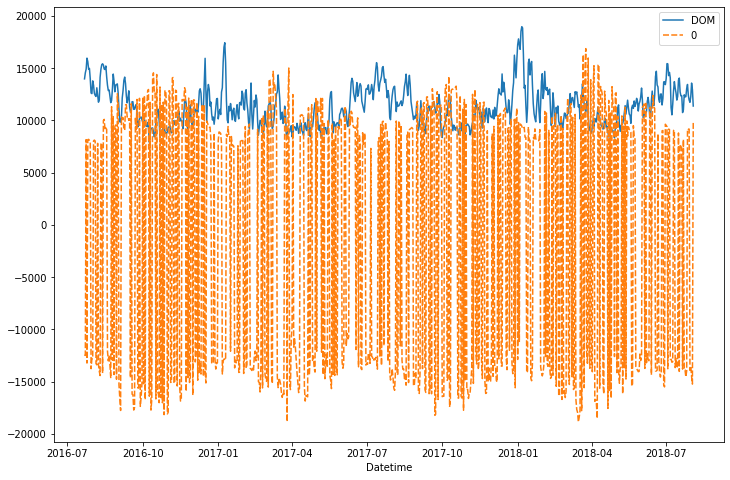

In [30]:
# demonstrate prediction
test_seq = y_test['DOM'].to_list()
test, _ = split_sequence(test_seq, n_steps)
test = test.reshape((test.shape[0], test.shape[1], n_features))
yhat = model.predict(test, verbose=0)
preds = pd.DataFrame(yhat)
y_test_lstm = y_test[100:]
y_test_lstm = pd.DataFrame(y_test_lstm)
fig, ax = plt.subplots(1,1,figsize=(12, 8))
df_predvtruth = pd.concat([y_test_lstm, preds.set_index(y_test_lstm.index)], axis=1)
sns.lineplot(data=df_predvtruth, ax=ax)

<AxesSubplot:xlabel='Datetime'>

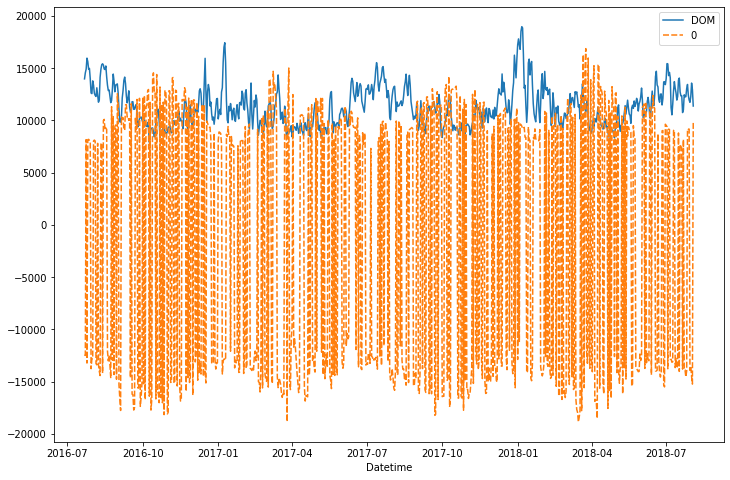

In [31]:
# Very strange behaviour :))) - adding a vertical constant seems to readjust the predictions
# TODO - look at preprocessing scalars 

fig, ax = plt.subplots(1,1,figsize=(12, 8))
#df_predvtruth.iloc[:, 1] = df_predvtruth.iloc[:, 1] + 5000
sns.lineplot(data=df_predvtruth, ax=ax)